<table>
  <tr>
    <td>Guy Uliel</td>
    <td>Rotem Dahan</td>
  </tr>
  <tr>
    <td>318439908</td>
    <td>316222215</td>
  </tr>
</table>


# **ML Project**
## **Table of Contents**
1. **Import Libraries + Load the Dataset**
2. **Handle Missing Values**
3. **Converting Data Types**
4. **Clustering**
5. **Classification**

# **Import Libraries**

In [3791]:
# Importing libraries for data analysis and processing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing tools for preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split

# Importing tools for machine learning and model building
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import  NearestNeighbors
from sklearn.decomposition import PCA


# Importing tools for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score
from sklearn.model_selection import cross_validate


# Tools for clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Tools for creating pipelines
from sklearn.pipeline import Pipeline


## **Load the Dataset**

In [3792]:
# path = "your/file/path/here"    ** Enter the path to your file here, and use mine as a comment
path = "C:\\Users\\guyul\\OneDrive\\מסמכים\\Guy Uliel\\הנדסת תעשיה וניהול\\שנה ד\\סמסטר א\\למידת מכונה\\למידת מכונה - פרויקט\\DataSets\\bph_infra_exist.csv"
data = data = pd.read_csv(path)
print("Initial Dataset Info:")
print(data.info())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5151 entries, 0 to 5150
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OID           5151 non-null   int64  
 1   ID            5151 non-null   int64  
 2   DIR           5151 non-null   int64  
 3   LENGTH        5151 non-null   float64
 4   BPHCODE       5151 non-null   object 
 5   BPHSEG        5151 non-null   int64  
 6   AUTHORITY     5151 non-null   object 
 7   AUTHCODE      5151 non-null   int64  
 8   TRAFAUTH      5151 non-null   object 
 9   TRAFCODE      5151 non-null   object 
 10  STREETNAME    5151 non-null   object 
 11  STREETCODE    5151 non-null   object 
 12  ROADNAME      5151 non-null   object 
 13  START_        5151 non-null   object 
 14  LAT_START     5151 non-null   float64
 15  LON_START     5151 non-null   float64
 16  FINISH        5151 non-null   object 
 17  LAT_END       5151 non-null   float64
 18  LON_EN

#  **Step 2: Handle Missing Values**


In [3793]:
# Replace empty strings or spaces with NaN
data = data.replace(r'^\s*$', pd.NA, regex=True)

# Recalculate missing values count and percentage
missing_values_fixed = data.isnull().sum().sort_values(ascending=False)
missing_percentage_fixed = (data.isnull().mean() * 100).sort_values(ascending=False)

# Create a DataFrame summarizing missing values
missing_data_fixed = pd.DataFrame({
    'Missing Values': missing_values_fixed,
    'Missing Percentage': missing_percentage_fixed
})

# Display updated missing data summary
missing_data_fixed.head(13)


,Missing Values,Missing Percentage
BPHCODE,5151,100.000000
Signpost,4345,84.352553
ROADNAME,2891,56.125024
STREETCODE,2432,47.214133
FINISH,1516,29.431178
START_,1401,27.198602
Level_,419,8.134343
STREETNAME,378,7.338381
TRAFAUTH,208,4.038051
TRAFCODE,208,4.038051


The generated table displays the columns with missing values and the percentage of missing values relative to the total number of values in each column. This information enables informed decision-making on how to handle the missing values, such as removing or imputing specific columns.


In [3794]:
data.head()

,OID,ID,DIR,LENGTH,BPHCODE,BPHSEG,AUTHORITY,AUTHCODE,TRAFAUTH,TRAFCODE,...,Level_,Paint,Trees,TWIDTH,TWIDTHWAY,LENGTH_M,MAX_SLOPE,OPEN_YEAR,LASTCHANGE,Shape_Length
0,-1,1,0,260.80,<NA>,0,אשדוד,70,אשדוד,0070,...,מדרכה,ללא,בצד אחד,180,90.0,260.80,-1.0,-1,20/07/2023 00:00:00,260.800183
1,-1,2,0,165.76,<NA>,0,אשדוד,70,אשדוד,0070,...,מדרכה,ללא,בצד אחד,220,110.0,165.76,-1.0,-1,20/07/2023 00:00:00,165.756748
2,-1,3,0,65.16,<NA>,0,אשדוד,70,אשדוד,0070,...,מדרכה,ללא,אין,220,110.0,65.16,-1.0,-1,20/07/2023 00:00:00,65.158851
3,-1,4,0,78.21,<NA>,0,אשדוד,70,אשדוד,0070,...,מדרכה,ללא,אין,160,80.0,78.21,-1.0,-1,20/07/2023 00:00:00,78.209215
4,-1,5,0,828.25,<NA>,0,אשדוד,70,אשדוד,0070,...,מדרכה,ללא,בצד אחד,200,100.0,828.25,-1.0,-1,20/07/2023 00:00:00,828.254437


### Removing Columns with High Missing Values (**BPHCODE,Signpost**)
At this stage, we are removing the columns BPHCODE and Signpost, which contain over 80% missing values

In [3795]:
# Display the number of columns and missing values before dropping
print(f"Number of columns before dropping: BPHCODE,Signpost: {data.shape[1]}")

# Drop columns with excessive missing values
data.drop(columns=['BPHCODE', 'Signpost'], inplace=True)

# Display number of columns after dropping
print(f"Number of columns after dropping: BPHCODE,Signpost: {data.shape[1]}")


Number of columns before dropping: BPHCODE,Signpost: 42
Number of columns after dropping: BPHCODE,Signpost: 40


### Filling Missing Values with Mode (**Level_,DIV_Walk,BPHPlace,BPHType**)
At this stage, we will fill the missing values in columns with a low percentage of missing data (Level_, DIV_Walk, BPHPlace, BPHType). We will use the most frequent value (mode) to fill in the gaps in order to preserve the existing patterns in the dataset.


In [3796]:
# List of columns to fill with their mode
columns_to_fill = ['Level_', 'DIV_Walk', 'BPHPlace', 'BPHType']

# Fill missing values in each column with the mode
for column in columns_to_fill:
    mode_value = data[column].mode()[0]  # Find the most frequent value
    data[column] = data[column].fillna(mode_value)  # Fill missing values without inplace to avoid warnings
    print(f"Filled missing values in {column} with mode: {mode_value}")

# Verify there are no missing values left in these columns
missing_after_fill = data[columns_to_fill].isnull().sum()
print("\nMissing values after filling:")
print(missing_after_fill)


Filled missing values in Level_ with mode: מדרכה
Filled missing values in DIV_Walk with mode: הפרדה פיזית קלה
Filled missing values in BPHPlace with mode: במדרכה בצמוד למיסעה
Filled missing values in BPHType with mode: שביל (ג)

Missing values after filling:
Level_      0
DIV_Walk    0
BPHPlace    0
BPHType     0
dtype: int64


### Analayze **ROADNAME** Column
At this stage, we convert invalid values in the ROADNAME column (e.g., -1 and '-1') to missing values (NaN) and evaluate the impact of this cleaning

In [ ]:
# Display the number of missing values before cleaning
missing_before_cleaning = data['ROADNAME'].isnull().sum()
print(f"Number of missing ROADNAME values before cleaning: {missing_before_cleaning}")

# Replace invalid values '-1' and -1 with NaN
data['ROADNAME'] = data['ROADNAME'].replace(['-1', -1], pd.NA)

# Calculate the number and percentage of missing values after cleaning
missing_roadname_after_cleaning = data['ROADNAME'].isnull().sum()
missing_roadname_percentage = (missing_roadname_after_cleaning / len(data)) * 100

print(f"Number of missing ROADNAME values after cleaning: {missing_roadname_after_cleaning}")
print(f"Percentage of missing ROADNAME values: {missing_roadname_percentage:.2f}%")


Number of missing ROADNAME values before cleaning: 2891
Number of missing ROADNAME values after cleaning: 4651
Percentage of missing ROADNAME values: 90.29%


This analysis revealed that over 90% of the values in the column are missing; therefore, in the next step, the column will be removed from the dataset.

### Removing **ROADNAME** Column
 we are removing the ROADNAME column, which contains approximately 90% missing values and therefore does not significantly contribute to the analysis or the model

In [3798]:
# Display number of columns before dropping
print(f"Number of columns before dropping ROADNAME: {data.shape[1]}")

# Drop the ROADNAME column
data.drop(columns=['ROADNAME'], inplace=True)

# Display number of columns after dropping
print(f"Number of columns after dropping ROADNAME: {data.shape[1]}")


Number of columns before dropping ROADNAME: 40
Number of columns after dropping ROADNAME: 39


### Filling Missing **STREETCODE** Values Based on **STREETNAME**
we are filling in missing values in the STREETCODE column based on a mapping between STREETNAME and the existing values in the STREETCODE column. This process reduces the number of missing values in the column and improves the data quality


In [3799]:
# Display the number of missing STREETCODE values before filling
missing_streetcode_before = data['STREETCODE'].isnull().sum()
print(f"Number of missing STREETCODE values before filling: {missing_streetcode_before}")

# Create a mapping of STREETNAME to the first non-null STREETCODE
streetcode_mapping = data.dropna(subset=['STREETCODE']).groupby('STREETNAME')['STREETCODE'].first().to_dict()

# Fill missing STREETCODE values using the mapping
data['STREETCODE'] = data['STREETCODE'].fillna(data['STREETNAME'].map(streetcode_mapping))

# Check the number and percentage of missing values after filling
missing_streetcode_after = data['STREETCODE'].isnull().sum()
missing_streetcode_percentage = (missing_streetcode_after / len(data)) * 100

print(f"Number of missing STREETCODE values after filling: {missing_streetcode_after}")
print(f"Percentage of missing STREETCODE values: {missing_streetcode_percentage:.2f}%")


Number of missing STREETCODE values before filling: 2432
Number of missing STREETCODE values after filling: 1886
Percentage of missing STREETCODE values: 36.61%


### Filling Missing **STREETCODE** Using Nearest Neighbors
 we are using a KNN model to fill in missing values in the STREETCODE column based on geographic coordinates (LAT_START, LON_START, LAT_END, LON_END). This method assumes a correlation between physical location and the street code.


In [3800]:
# Split data into rows with and without STREETCODE
data_valid = data[data['STREETCODE'].notnull() & (data['STREETCODE'].astype(str).str.strip() != '')]
data_missing = data[data['STREETCODE'].isnull() | (data['STREETCODE'].astype(str).str.strip() == '')]

# Ensure there are enough data points for the process
if data_valid.empty or data_missing.empty:
    raise ValueError("Not enough valid or missing data to proceed.")

# Prepare coordinates for the kNN model
valid_coords = data_valid[['LAT_START', 'LON_START', 'LAT_END', 'LON_END']].values
missing_coords = data_missing[['LAT_START', 'LON_START', 'LAT_END', 'LON_END']].values

# Create and fit the kNN model
knn = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn.fit(valid_coords)

# Predict STREETCODE values for missing data
distances, indices = knn.kneighbors(missing_coords)
data_missing = data_missing.copy()  # Avoid warnings
data_missing['STREETCODE'] = data_valid.iloc[indices.flatten()]['STREETCODE'].values

# Update the original dataset with the filled data
data.update(data_missing)

# Check the number of remaining missing STREETCODE values
remaining_missing_streetcode = (data['STREETCODE'].astype(str).str.strip() == '').sum()
print(f"Number of missing STREETCODE values after step 2: {remaining_missing_streetcode}")


Number of missing STREETCODE values after step 2: 0


### Filling Missing **STREETNAME** Using Nearest Neighbors

 we are using a KNN model to fill in missing values in the STREETCODE column based on geographic coordinates (LAT_START, LON_START, LAT_END, LON_END). This method assumes a correlation between physical location and the street code.

In [3801]:
# Split data into rows with and without STREETNAME
data_valid_name = data[data['STREETNAME'].notnull() & (data['STREETNAME'].astype(str).str.strip() != '')]
data_missing_name = data[data['STREETNAME'].isnull() | (data['STREETNAME'].astype(str).str.strip() == '')]

# Ensure there are enough data points for the process
if data_valid_name.empty or data_missing_name.empty:
    raise ValueError("Not enough valid or missing data to proceed.")

# Prepare coordinates for the kNN model
valid_coords_name = data_valid_name[['LAT_START', 'LON_START', 'LAT_END', 'LON_END']].values
missing_coords_name = data_missing_name[['LAT_START', 'LON_START', 'LAT_END', 'LON_END']].values

# Create and fit the kNN model
knn_name = NearestNeighbors(n_neighbors=1, metric='euclidean')
knn_name.fit(valid_coords_name)

# Predict STREETNAME values for missing data
distances_name, indices_name = knn_name.kneighbors(missing_coords_name)
data_missing_name = data_missing_name.copy()  # Avoid warnings
data_missing_name['STREETNAME'] = data_valid_name.iloc[indices_name.flatten()]['STREETNAME'].values

# Update the original dataset with the filled data
data.update(data_missing_name)

# Check the number of remaining missing STREETNAME values
remaining_missing_streetname = (data['STREETNAME'].astype(str).str.strip() == '').sum()
print(f"Number of missing STREETNAME values after filling: {remaining_missing_streetname}")

Number of missing STREETNAME values after filling: 0


### Analyzing and Removing **TRAFAUTH** Column

we will examine the relationship between the AUTHORITY and TRAFAUTH columns to determine if there is any significant difference between them. If the columns are found to be nearly identical, we will remove TRAFAUTH to simplify the dataset.

In [3802]:
# Check the unique values in AUTHORITY and TRAFAUTH columns
auth_values = data['AUTHORITY'].unique()
trafauth_values = data['TRAFAUTH'].unique()

# Compare the unique values between the two columns
are_distributions_identical = set(auth_values) == set(trafauth_values)

# Count the number of rows where the values differ between the two columns
differing_rows_count = (data['AUTHORITY'] != data['TRAFAUTH']).sum()

# Summarize the results
print(f"Number of unique values in AUTHORITY: {len(auth_values)}")
print(f"Number of unique values in TRAFAUTH: {len(trafauth_values)}")
print(f"Are the distributions identical? {are_distributions_identical}")
print(f"Number of differing rows: {differing_rows_count}")

# Display rows where AUTHORITY and TRAFAUTH differ
differing_rows = data[data['AUTHORITY'] != data['TRAFAUTH']]
print("Rows where AUTHORITY and TRAFAUTH differ:")
print(differing_rows[['AUTHORITY', 'TRAFAUTH']].head(10))  # Display first 10 differing rows

# Remove the TRAFAUTH column as it adds no additional value
data.drop(columns=['TRAFAUTH'], inplace=True)
print("TRAFAUTH column has been removed.")


Number of unique values in AUTHORITY: 53
Number of unique values in TRAFAUTH: 50
Are the distributions identical? False
Number of differing rows: 210
Rows where AUTHORITY and TRAFAUTH differ:
       AUTHORITY TRAFAUTH
3102  גבעת שמואל     <NA>
3104  גבעת שמואל     <NA>
3105  גבעת שמואל     <NA>
3106  גבעת שמואל     <NA>
3107  גבעת שמואל     <NA>
3111  גבעת שמואל     <NA>
3157  גבעת שמואל     <NA>
3158  גבעת שמואל     <NA>
3159  גבעת שמואל     <NA>
3160  גבעת שמואל     <NA>
TRAFAUTH column has been removed.


 4941 out of 5151 rows show similarity(96%); therefore, we will remove the TRAFAUTH column.

### Analyzing and Removing TRAFCODE Column
we will examine the relationship between the AUTHCODE and TRAFCODE columns to identify any significant differences. If the difference is found to be solely due to leading zeros, we will remove the TRAFCODE column to avoid redundancy and simplify the dataset.

In [3803]:
# Replace NA values with a temporary placeholder for comparison
authcode_clean = data['AUTHCODE'].fillna("MISSING")
trafcode_clean = data['TRAFCODE'].fillna("MISSING")

# Check the unique values in AUTHCODE and TRAFCODE columns
authcode_values = authcode_clean.unique()
trafcode_values = trafcode_clean.unique()

# Compare the unique values between the two columns
are_distributions_identical = set(authcode_values) == set(trafcode_values)

# Count the number of rows where the values differ between the two columns
differing_rows_count = (authcode_clean != trafcode_clean).sum()

# Summarize the results
print(f"Number of unique values in AUTHCODE: {len(authcode_values)}")
print(f"Number of unique values in TRAFCODE: {len(trafcode_values)}")
print(f"Are the distributions identical? {are_distributions_identical}")
print(f"Number of differing rows: {differing_rows_count}")

# Display rows where AUTHCODE and TRAFCODE differ
differing_rows = data[authcode_clean != trafcode_clean]
print("Rows where AUTHCODE and TRAFCODE differ:")

# Remove the TRAFCODE column since the difference is only in formatting
data.drop(columns=['TRAFCODE'], inplace=True)
print("TRAFCODE column has been removed.")


Number of unique values in AUTHCODE: 53
Number of unique values in TRAFCODE: 50
Are the distributions identical? False
Number of differing rows: 5151
Rows where AUTHCODE and TRAFCODE differ:
TRAFCODE column has been removed.


### Removing **START_** and **FINISH** Columns
The START_ and FINISH columns contain free-text descriptions of locations (e.g., intersections, roundabouts) that don’t add much value to the model and have around 30% missing data. Therefore, we’ve decided to remove them

In [3804]:
# Check the number of missing values before dropping the columns
print(f"Number of missing values in START_: {data['START_'].isnull().sum()}")
print(f"Number of missing values in FINISH: {data['FINISH'].isnull().sum()}")


Number of missing values in START_: 1401
Number of missing values in FINISH: 1516


In [3805]:
# Drop the columns START_ and FINISH
data.drop(columns=['START_', 'FINISH'], inplace=True)

In [3806]:
# Check for missing values
missing_summary = data.isnull().sum()
missing_percentage = (data.isnull().mean() * 100).sort_values(ascending=False)

# Display summary of missing values
missing_data_summary = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_percentage
})

# Print only columns with missing values (if any)
if missing_data_summary['Missing Count'].sum() > 0:
    print("Missing Values Summary (only columns with missing data):")
    print(missing_data_summary[missing_data_summary['Missing Count'] > 0])
else:
    print("No missing values found in the dataset.")


No missing values found in the dataset.


##  **Convert types**

In [3807]:
data.dtypes

OID               int64
ID                int64
DIR               int64
LENGTH          float64
BPHSEG            int64
AUTHORITY        object
AUTHCODE          int64
STREETNAME       object
STREETCODE       object
LAT_START       float64
LON_START       float64
LAT_END         float64
LON_END         float64
BPHDIR           object
BPHType          object
Usable           object
Infra            object
RoadType         object
BPHPlace         object
DirType          object
DirTraffic       object
Topology         object
DIV_Veh          object
DIV_Walk         object
Parking          object
Level_           object
Paint            object
Trees            object
TWIDTH            int64
TWIDTHWAY       float64
LENGTH_M        float64
MAX_SLOPE       float64
OPEN_YEAR         int64
LASTCHANGE       object
Shape_Length    float64
dtype: object

In [3808]:
# List of columns to convert to numeric categories
columns_to_convert = [
    'BPHType', 'Infra', 'Usable', 'RoadType', 'BPHDIR', 'BPHPlace', 'DirType',
    'DirTraffic', 'Topology', 'DIV_Veh', 'DIV_Walk', 'Parking', 'Level_', 'Paint', 'Trees','AUTHORITY','AUTHCODE'
]

# Convert each column to numeric categories while retaining 'category' type
for column in columns_to_convert:
    if column in data.columns:  # Ensure the column exists in the DataFrame
        data[column] = data[column].astype('category').cat.codes
        data[column] = data[column].astype('category')  # Retain 'category' type
        print(f"Converted {column} to numeric while retaining 'category' type.")


Converted BPHType to numeric while retaining 'category' type.
Converted Infra to numeric while retaining 'category' type.
Converted Usable to numeric while retaining 'category' type.
Converted RoadType to numeric while retaining 'category' type.
Converted BPHDIR to numeric while retaining 'category' type.
Converted BPHPlace to numeric while retaining 'category' type.
Converted DirType to numeric while retaining 'category' type.
Converted DirTraffic to numeric while retaining 'category' type.
Converted Topology to numeric while retaining 'category' type.
Converted DIV_Veh to numeric while retaining 'category' type.
Converted DIV_Walk to numeric while retaining 'category' type.
Converted Parking to numeric while retaining 'category' type.
Converted Level_ to numeric while retaining 'category' type.
Converted Paint to numeric while retaining 'category' type.
Converted Trees to numeric while retaining 'category' type.
Converted AUTHORITY to numeric while retaining 'category' type.
Converte

In [3809]:
data.dtypes

OID                int64
ID                 int64
DIR                int64
LENGTH           float64
BPHSEG             int64
AUTHORITY       category
AUTHCODE        category
STREETNAME        object
STREETCODE        object
LAT_START        float64
LON_START        float64
LAT_END          float64
LON_END          float64
BPHDIR          category
BPHType         category
Usable          category
Infra           category
RoadType        category
BPHPlace        category
DirType         category
DirTraffic      category
Topology        category
DIV_Veh         category
DIV_Walk        category
Parking         category
Level_          category
Paint           category
Trees           category
TWIDTH             int64
TWIDTHWAY        float64
LENGTH_M         float64
MAX_SLOPE        float64
OPEN_YEAR          int64
LASTCHANGE        object
Shape_Length     float64
dtype: object

In [3810]:
data.head()

,OID,ID,DIR,LENGTH,BPHSEG,AUTHORITY,AUTHCODE,STREETNAME,STREETCODE,LAT_START,...,Level_,Paint,Trees,TWIDTH,TWIDTHWAY,LENGTH_M,MAX_SLOPE,OPEN_YEAR,LASTCHANGE,Shape_Length
0,-1,1,0,260.80,0,4,3,-1,0796,631199.56,...,2,0,1,180,90.0,260.80,-1.0,-1,20/07/2023 00:00:00,260.800183
1,-1,2,0,165.76,0,4,3,שדרות הים התיכון,0796,630970.36,...,2,0,1,220,110.0,165.76,-1.0,-1,20/07/2023 00:00:00,165.756748
2,-1,3,0,65.16,0,4,3,שדרות הים התיכון,0796,631087.12,...,2,0,0,220,110.0,65.16,-1.0,-1,20/07/2023 00:00:00,65.158851
3,-1,4,0,78.21,0,4,3,משה דיין,0796,631182.02,...,2,0,0,160,80.0,78.21,-1.0,-1,20/07/2023 00:00:00,78.209215
4,-1,5,0,828.25,0,4,3,משה דיין,0796,631225.79,...,2,0,1,200,100.0,828.25,-1.0,-1,20/07/2023 00:00:00,828.254437


## **Clustering**

### **Feature Selection for Clustering**
#### Select relevant features for clustering and scale the data for better algorithm performance.

In [3811]:
# Define a list of numerical columns that are relevant for clustering analysis.
valid_numerical_columns = ['LENGTH', 'LAT_START', 'LON_START', 'LAT_END', 'LON_END', 'TWIDTH', 'TWIDTHWAY', 'LENGTH_M', 'Shape_Length']
data_numerical = data[valid_numerical_columns].copy()
data_cluster = data_numerical[(data_numerical['LENGTH'] > 0) & (data_numerical['LENGTH_M'] > 0)]

# Standardize the data using StandardScaler to ensure all features have equal weight.
scaler = StandardScaler()
scaled_clustering_data = scaler.fit_transform(data_cluster)


###  **Clustering Analysis**
#### Perform clustering using KMeans, DBSCAN, and Agglomerative Clustering, and evaluate results using silhouette scores.


In [3812]:
# Step 1: PCA for Dimensionality Reduction (90% Variance)
pca = PCA(n_components=0.9)  # Retain at least 90% of variance
reduced_data = pca.fit_transform(scaled_clustering_data)
print(f"🔑 PCA Components: {pca.n_components_}")


🔑 PCA Components: 4


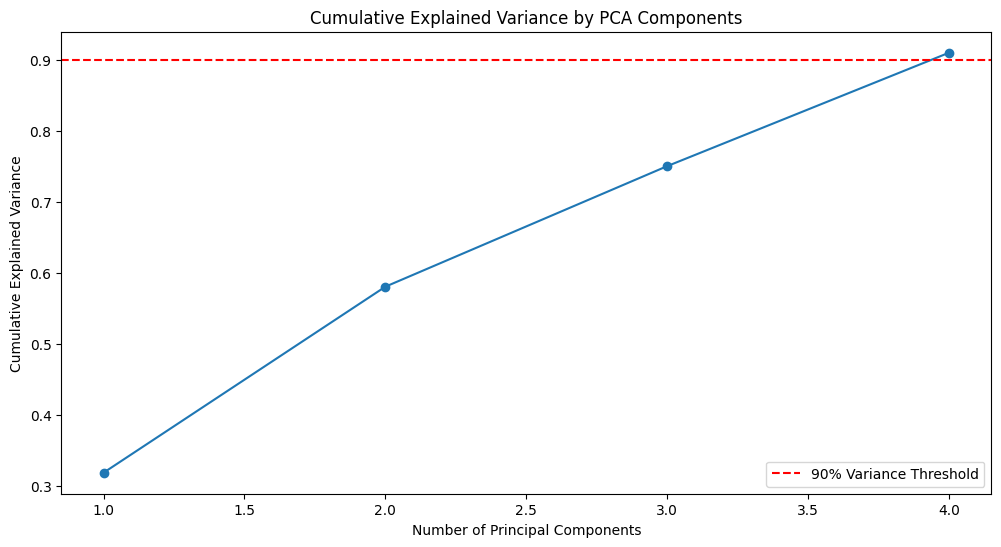

In [3813]:
# PCA Component Contribution
explained_variance_ratio = pca.explained_variance_ratio_  # Variance per component
cumulative_variance = np.cumsum(explained_variance_ratio)  # Cumulative variance

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.show()


In [3814]:
# PCA Loadings Matrix
pca_loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=valid_numerical_columns
)

print("\n🔍 PCA Loadings Matrix:")
print(pca_loadings)

# Top 2 contributing features per PCA component
top_2_features = {
    component: pca_loadings[component].abs().nlargest(2).items()
    for component in pca_loadings.columns
}

print("\n🔑 Top 2 contributing features per PCA component:")
for component, features in top_2_features.items():
    print(f"{component}:")
    for feature, contribution in features:
        print(f"  - {feature}: {contribution:.4f}")



🔍 PCA Loadings Matrix:
                   PC1       PC2       PC3       PC4
LENGTH        0.452887 -0.006529  0.165194 -0.257685
LAT_START    -0.147093  0.503340  0.470467 -0.047110
LON_START     0.169650  0.456426 -0.448265  0.246577
LAT_END      -0.146871  0.503566  0.470226 -0.046945
LON_END       0.156405  0.490157 -0.403747  0.237669
TWIDTH        0.272313 -0.094546  0.228950  0.590514
TWIDTHWAY     0.154203 -0.177089  0.316116  0.611660
LENGTH_M      0.547955  0.045544  0.083542 -0.211013
Shape_Length  0.547955  0.045544  0.083542 -0.211013

🔑 Top 2 contributing features per PCA component:
PC1:
  - LENGTH_M: 0.5480
  - Shape_Length: 0.5480
PC2:
  - LAT_END: 0.5036
  - LAT_START: 0.5033
PC3:
  - LAT_START: 0.4705
  - LAT_END: 0.4702
PC4:
  - TWIDTHWAY: 0.6117
  - TWIDTH: 0.5905


In [3815]:
# Step 2: Optimal Number of Clusters with K-Means
cluster_range = range(2, 11)  # Range of cluster numbers to evaluate
silhouette_scores = []  # Store silhouette scores for each k

# Evaluate silhouette score for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced_data)
    silhouette_scores.append(silhouette_score(reduced_data, kmeans.labels_))

# Determine the optimal number of clusters
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"🔑 Optimal number of clusters for K-Means: {optimal_clusters}")

# Print silhouette scores for each k
for i, score in enumerate(silhouette_scores):
    print(f"{i+2} clusters: {score:.4f}")

# Step 2.1: Define Clustering Algorithms
clustering_algorithms = {
    "K-Means": KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10),
    "DBSCAN": DBSCAN(eps=0.5, min_samples=5),
    "Agglomerative Clustering": AgglomerativeClustering(n_clusters=optimal_clusters)
}


🔑 Optimal number of clusters for K-Means: 4
2 clusters: 0.3256
3 clusters: 0.3324
4 clusters: 0.3357
5 clusters: 0.2647
6 clusters: 0.2735
7 clusters: 0.3059
8 clusters: 0.3244
9 clusters: 0.3017
10 clusters: 0.3197


🔹 **K-Means Results:**
Silhouette Score: 0.3356559188304694
Number of Clusters: 4
Noise Points: 0
Cluster Distribution:
0    3314
1    1468
2     311
3       3
Name: count, dtype: int64
--------------------------------------------------


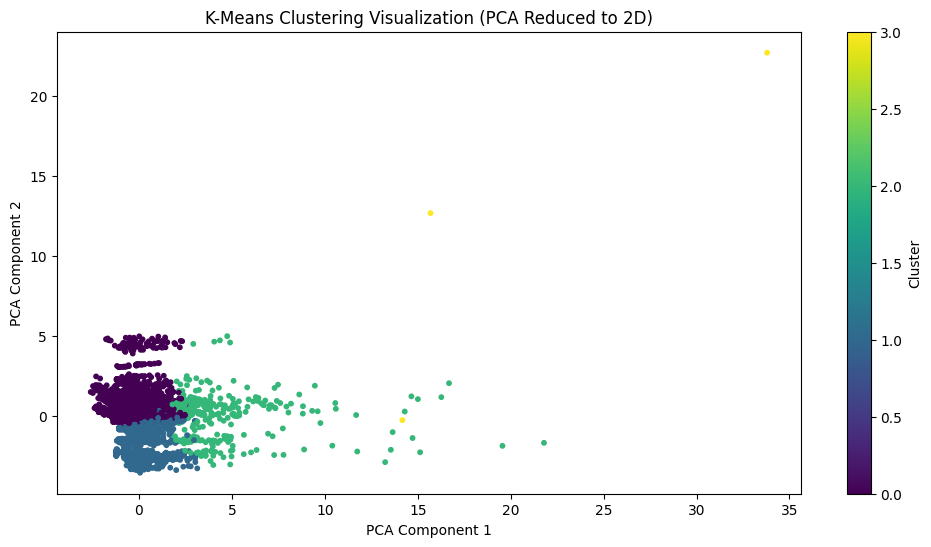

🔹 **DBSCAN Results:**
Silhouette Score: 0.03217169008110994
Number of Clusters: 24
Noise Points: 379
Cluster Distribution:
 3     2910
 0      698
 8      480
-1      379
 13     284
 17      68
 2       41
 20      33
 5       29
 22      25
 21      24
 19      15
 23      13
 7       12
 4       12
 14       9
 16       9
 18       9
 9        8
 15       7
 6        7
 1        7
 10       7
 12       5
 11       5
Name: count, dtype: int64
--------------------------------------------------


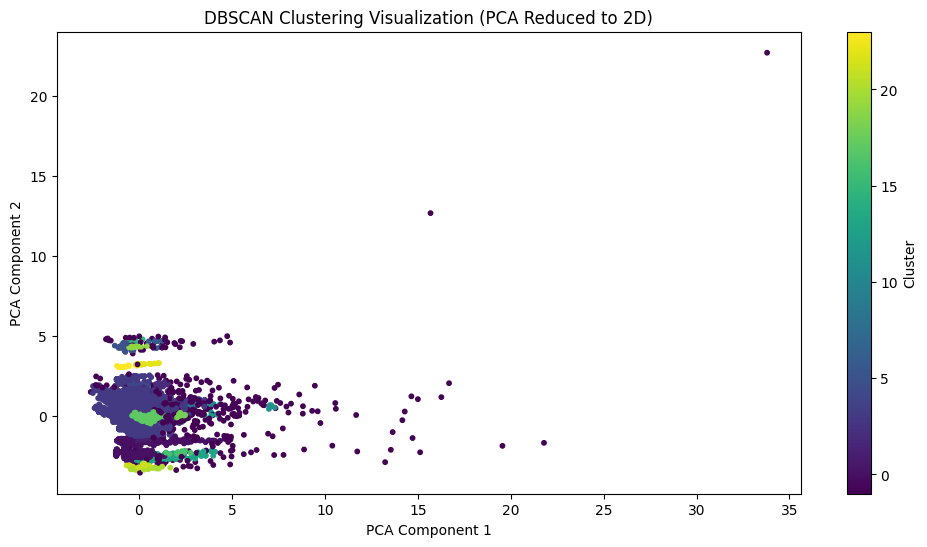

🔹 **Agglomerative Clustering Results:**
Silhouette Score: 0.29905167613854367
Number of Clusters: 4
Noise Points: 0
Cluster Distribution:
2    3267
1    1101
0     725
3       3
Name: count, dtype: int64
--------------------------------------------------


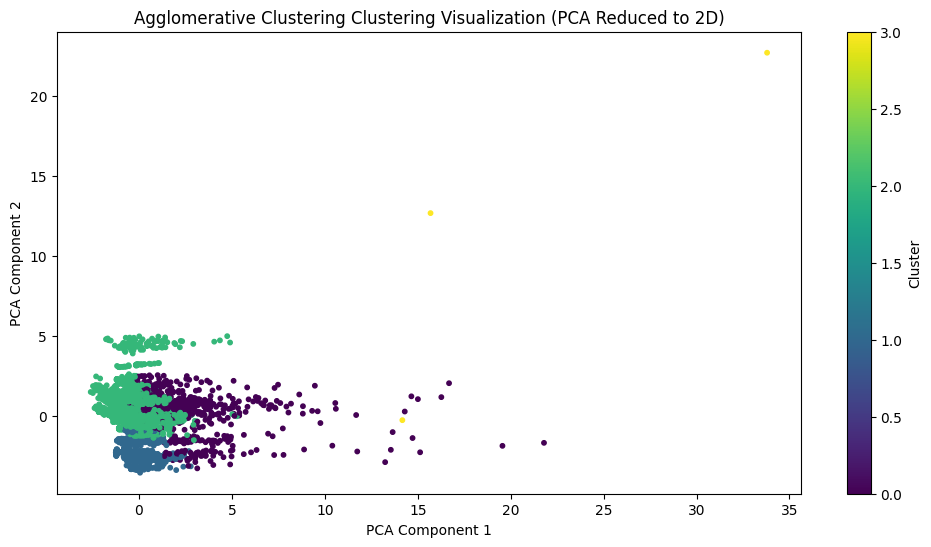

In [3816]:
# Step 3: Evaluate Clustering Algorithms
results = []

for name, algorithm in clustering_algorithms.items():
    labels = algorithm.fit_predict(reduced_data)
    silhouette = silhouette_score(reduced_data, labels) if len(set(labels)) > 1 else "N/A"
    num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    noise_points = (labels == -1).sum()
    
    results.append({
        "Algorithm": name,
        "Silhouette Score": silhouette,
        "Number of Clusters": num_clusters,
        "Noise Points": noise_points
    })
    
    print(f"🔹 **{name} Results:**")
    print(f"Silhouette Score: {silhouette}")
    print(f"Number of Clusters: {num_clusters}")
    print(f"Noise Points: {noise_points}")
    print("Cluster Distribution:")
    print(pd.Series(labels).value_counts())
    print("-" * 50)

    # Step 3.1: Visualization with PCA (2 Components)*
    pca_2d = PCA(n_components=2) # Reduce data to 2 principal components
    data_pca_2d = pca_2d.fit_transform(reduced_data)
    
    plt.figure(figsize=(12, 6))
    plt.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f"{name} Clustering Visualization (PCA Reduced to 2D)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(label="Cluster")
    plt.show()


#### Cluster 0 (Purple): Very short paths (19 m), likely narrow trails (163 cm) or minor segments within urban areas (e.g., alleys or similar paths).

#### Cluster 1 (Green): Medium-length paths (56 m) with relatively wide width (246 cm) located within urban areas.

#### Cluster 2 (Blue): Long segments (459 m) with a large width (251 cm), most likely along main routes or intercity roads.

#### Cluster 3 (Yellow): Short segments (49 m) with medium width (226 cm).

### **Clustering Results Summary**

##### Based on the **Silhouette Score**, **K-Means** was identified as the best-performing clustering algorithm. It achieved the highest silhouette score, indicating well-separated and cohesive clusters compared to the other algorithms. 

## **Classification**


###  ***I will develop five classification models to predict the category of a bike trail segment***

### **Table of Contents**
1. Analysis of Data Distribution (Column: LENGTH_M)
2. Selection of Target Categories for Prediction
3. Selection of Predictive Features
4. Model Building and Comparison using Cross-Validation (CV)
5. Running the Best Model on the Test Set

### 1. **Data Distribution and Outliers**

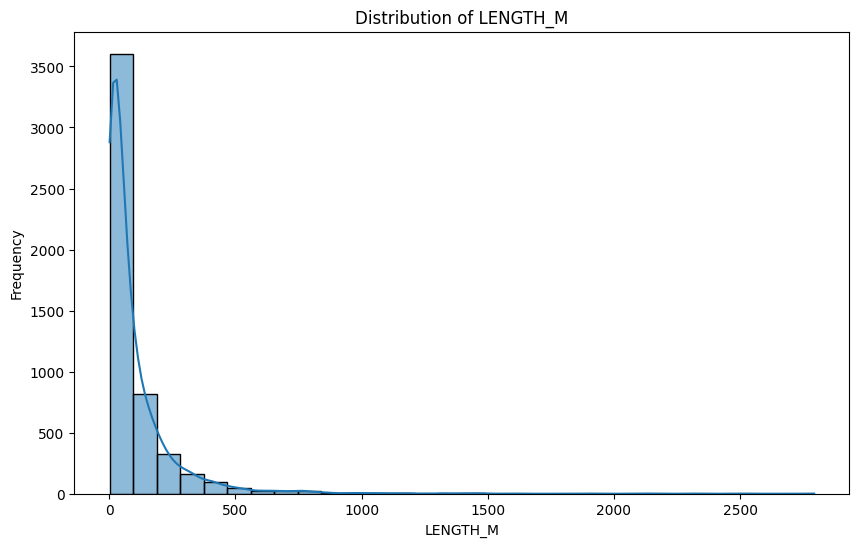

In [3817]:
# Displaying the distribution of LENGTH_M
plt.figure(figsize=(10, 6))
sns.histplot(data['LENGTH_M'], bins=30, kde=True)  
plt.title('Distribution of LENGTH_M')
plt.xlabel('LENGTH_M')
plt.ylabel('Frequency')
plt.show()


It can be observed that most segments fall within a range of up to 500 meters

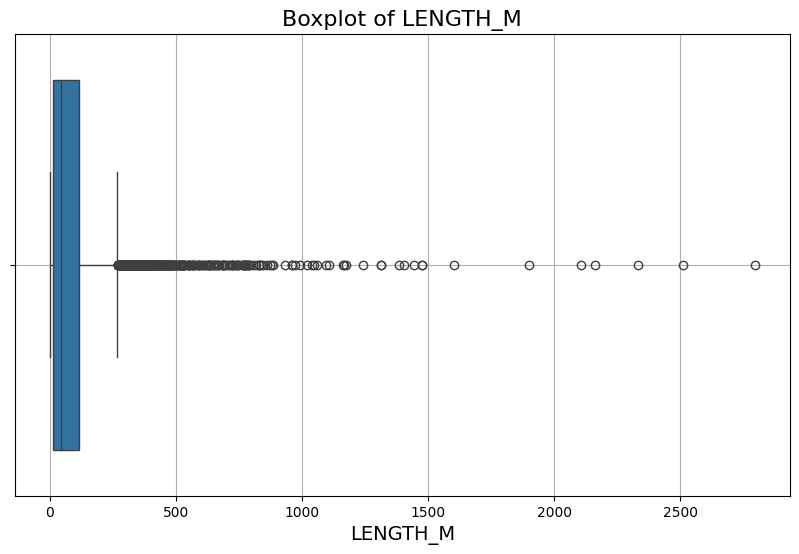

In [3818]:
# Boxplot to visualize potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['LENGTH_M'])
plt.title('Boxplot of LENGTH_M', fontsize=16)
plt.xlabel('LENGTH_M', fontsize=14)
plt.grid(True)
plt.show()

High concentration of data in the lower range:
Most of the data is concentrated in a very small range, below 850, which aligns with the skewed distribution shown in the previous histogram.

Numerous outliers:
There is a significant number of outliers appearing far beyond the whiskers of the boxplot. These are exceptionally high values that may affect statistical analyses or models sensitive to extreme values.

In [3819]:
# Identify outliers using IQR (Interquartile Range)
Q1 = data['LENGTH_M'].quantile(0.25)
Q3 = data['LENGTH_M'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [3820]:
# Filter potential outliers
outliers = data[(data['LENGTH_M'] < lower_bound) | (data['LENGTH_M'] > upper_bound)]
print(f"Number of outliers detected: {len(outliers)}")
print("Outliers summary:")
print(outliers[['LENGTH_M']].describe())


Number of outliers detected: 436
Outliers summary:
          LENGTH_M
count   436.000000
mean    494.609266
std     314.404197
min     268.820000
25%     317.722500
50%     394.315000
75%     531.110000
max    2793.890000


In [3821]:
print(f"Number of rows before cleaning: {len(data)}")
# Remove outliers where LENGTH_M is above 1500 or below 5
data = data[(data['LENGTH_M'] <= 500) & (data['LENGTH_M'] >= 5)]

print(f"Number of rows after cleaning: {len(data)}")


Number of rows before cleaning: 5151
Number of rows after cleaning: 4786


I chose to use data greater than 5 and less than 500


### 2. **Choosing the Category Division**

Visual inspection of the distribution after filtering

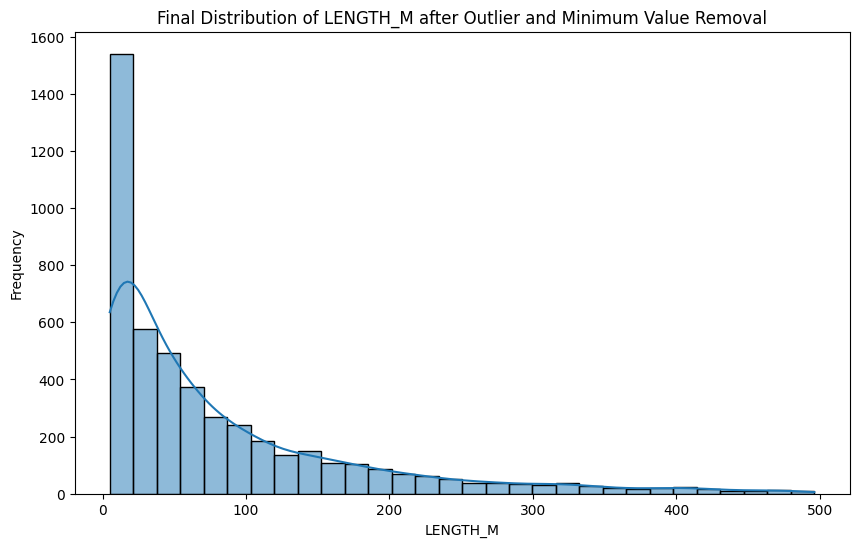

In [3822]:
plt.figure(figsize=(10, 6))
sns.histplot(data['LENGTH_M'], bins=30, kde=True)
plt.title('Final Distribution of LENGTH_M after Outlier and Minimum Value Removal')
plt.xlabel('LENGTH_M')
plt.ylabel('Frequency')
plt.show()


We created a histogram with KDE (Kernel Density Estimation) to visualize the distribution after filtering. The distribution appears more balanced, with fewer outliers. Most data points fall within reasonable ranges.

Key Insights:
High concentration of very short trails (0-20 meters):
Most trails are in this range, with a noticeable peak near 0. This naturally forms a "Short" category.

Gradual decline as length increases (20-1000 meters):
While less frequent than the shortest range, this is still a common range and suits the "Medium" category.

Few very long trails (over 100 meters):
The number of trails drops significantly in this range, making it ideal for the "Long" category.

In [3823]:
# Define categories based on LENGTH_M
def categorize_length(length):
    if length < 20:
        return 'Short'
    elif 20 <= length < 100:
        return 'Medium'
    else:  
        return 'Long'

Category Distribution:
Length_Category
Medium    1964
Short     1480
Long      1342
Name: count, dtype: int64


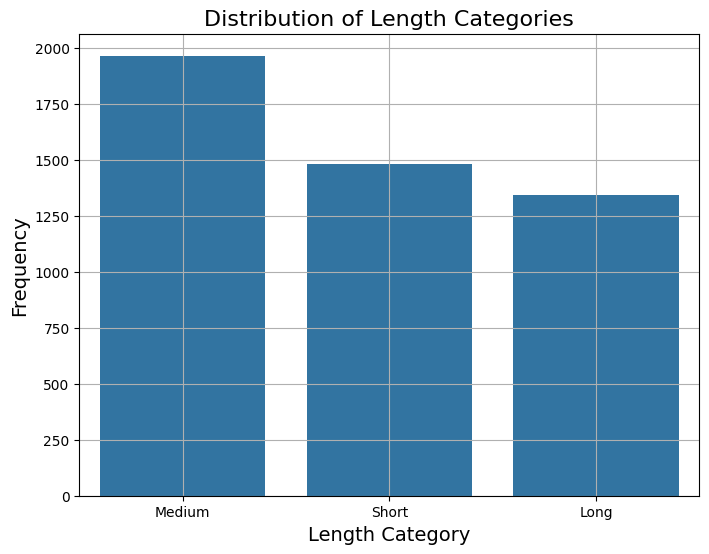

In [3824]:
# Apply categorization
data['Length_Category'] = data['LENGTH_M'].apply(categorize_length)

# Display category distribution
category_counts = data['Length_Category'].value_counts()
print("Category Distribution:")
print(category_counts)

# Visualize the category distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Length Categories', fontsize=16)
plt.xlabel('Length Category', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


In [3825]:
# Calculating the ratio for each category
category_ratios = category_counts / category_counts.sum()

print("\nCategory ratios:")
print(category_ratios)



Category ratios:
Length_Category
Medium    0.410364
Short     0.309235
Long      0.280401
Name: count, dtype: float64


### 3.**Feature Selection**
#### ***Dropping Irrelevant Columns***

In [3826]:
# Identification Columns
colunms_to_drop = ['OID','ID','BPHSEG',]

In [3827]:
# Undefined Colunm
colunms_to_drop.append('DIR')
data['DIR'].unique()

array([0], dtype=int64)

In [3828]:
# another Length Colunm that has an highe correlation with LENGTH_M 
data[['LENGTH', 'LENGTH_M']].corr()

,LENGTH,LENGTH_M
LENGTH,1.000000,0.700047
LENGTH_M,0.700047,1.000000


In [3829]:
# another Length Colunm that has an highe correlation with LENGTH_M 
colunms_to_drop.append('LENGTH')

In [3830]:
# Not good values (-1,0) that means nothing
colunms_to_drop.append('MAX_SLOPE')
data['MAX_SLOPE'].unique()

array([-1.,  0.])

In [3831]:
# Not good values (-1,0) that means nothing
colunms_to_drop.append('OPEN_YEAR')
data['OPEN_YEAR'].unique()

array([-1,  0], dtype=int64)

In [3832]:
# Dates are not going to be relvant for the prediction that needs to be in general
colunms_to_drop.append('LASTCHANGE')
data['LASTCHANGE'].unique()

array(['20/07/2023 00:00:00', '22/05/2023 00:00:00',
       '30/05/2023 00:00:00', '31/07/2023 00:00:00',
       '24/07/2023 00:00:00', '23/08/2023 00:00:00',
       '24/08/2023 00:00:00', '31/08/2023 00:00:00',
       '30/10/2023 00:00:00', '13/08/2023 00:00:00',
       '15/08/2023 00:00:00', '06/09/2023 00:00:00',
       '14/01/2024 00:00:00', '08/05/2023 00:00:00',
       '18/12/2023 00:00:00', '10/08/2023 00:00:00',
       '10/09/2023 00:00:00', '30/11/2023 00:00:00',
       '09/01/2024 00:00:00', '14/03/2023 00:00:00',
       '21/02/2023 00:00:00', '24/05/2023 00:00:00',
       '18/04/2023 00:00:00', '18/05/2023 00:00:00'], dtype=object)

In [3833]:
# The same Col values as LENGTH_M
data[['Shape_Length', 'LENGTH_M']].corr()

,Shape_Length,LENGTH_M
Shape_Length,1.0,1.0
LENGTH_M,1.0,1.0


In [3834]:
colunms_to_drop.append('Shape_Length')

In [3835]:
data = data.drop(columns=colunms_to_drop)

#### Correlation Analysis for Numerical Features
To identify relationships between the numerical features and the target column (LENGTH_M_CAT), aiming to understand which features have a stronger influence.

A high correlation (positive or negative) may indicate significant features for prediction.

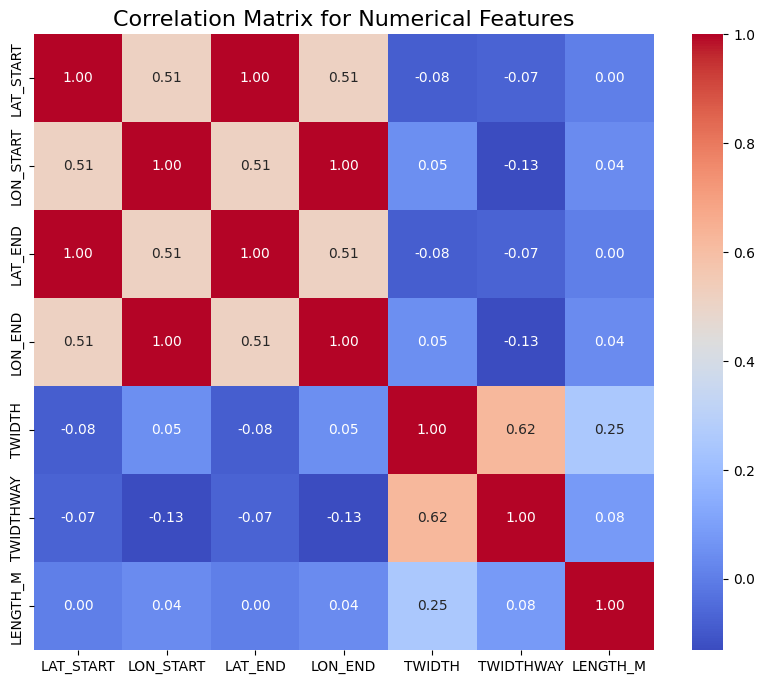

In [3836]:
# Correlation matrix for numerical features
numerical_features = ['LAT_START', 'LON_START', 'LAT_END', 'LON_END', 'TWIDTH', 'TWIDTHWAY', 'LENGTH_M']
correlation_matrix = data[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features', fontsize=16)
plt.show()


I don’t want to use a combination of latitude or longitude values that would affect the distance, and ideally, I prefer not to use features that could influence the distance, so i will drop the END'S for that moment. 
another reason to drop them is beacuse of the NO correlation with LENGTH_M  

in addition,Given the high correlation between TWIDTH and TWIDTHWAY, we might be able to drop one of them to avoid overlapping information. It is likely that we will keep TWIDTH since it is easier to interpret and may serve as a better representative feature.

**Keeping only TWIDTH,LAT_START and LON_START at this moment**

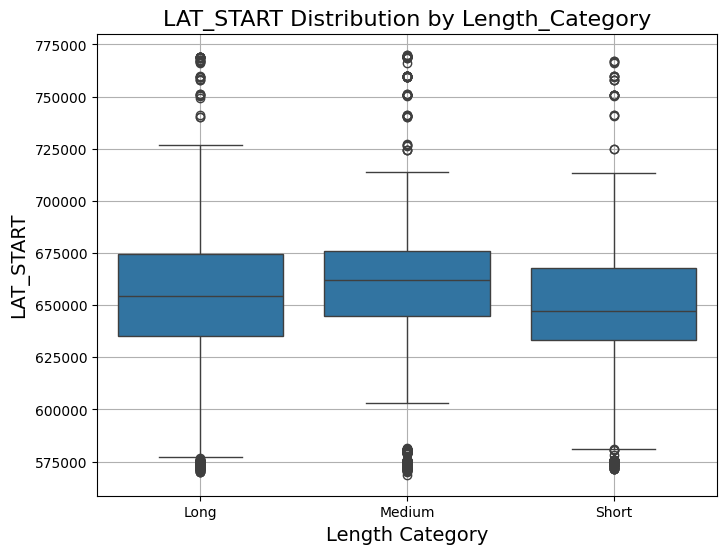

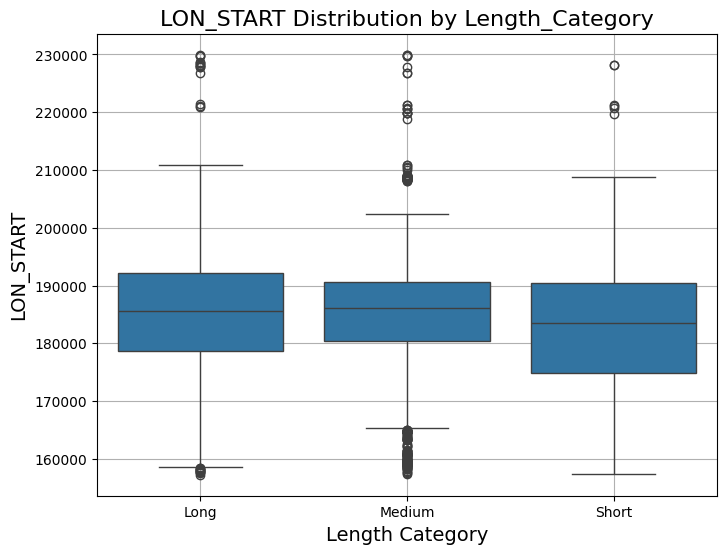

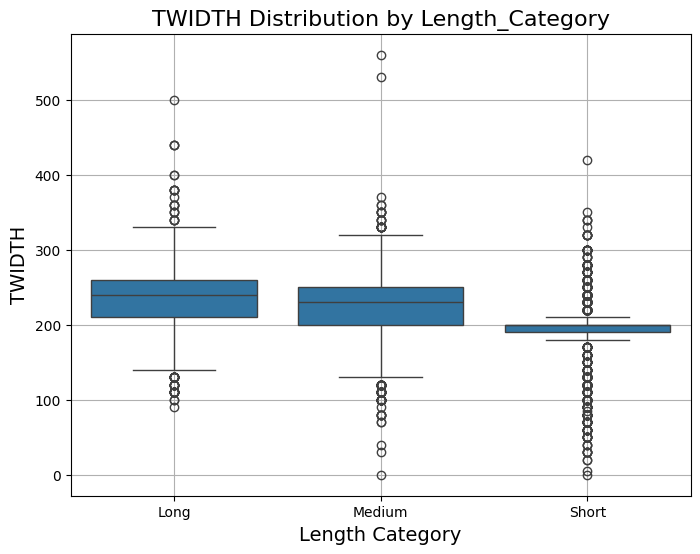

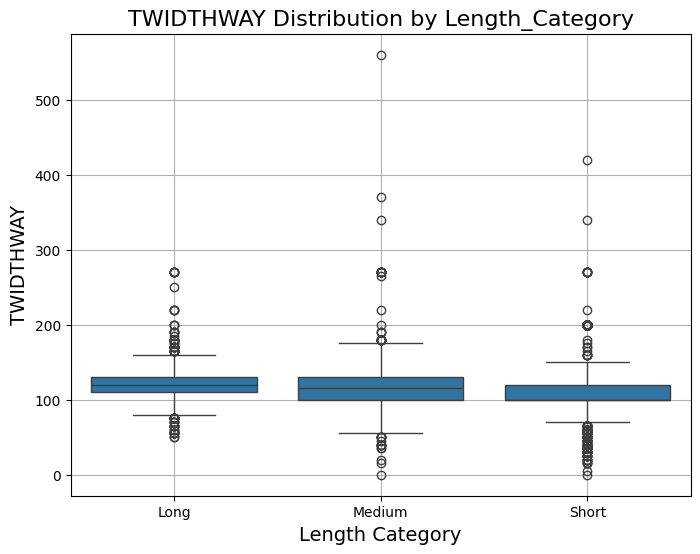

In [3837]:
# Numerical features to analyze
numerical_features = ['LAT_START', 'LON_START', 'TWIDTH', 'TWIDTHWAY']

# Boxplots for each numerical feature by Length_Category
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Length_Category'], y=data[feature])
    plt.title(f'{feature} Distribution by Length_Category', fontsize=16)
    plt.xlabel('Length Category', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.grid(True)
    plt.show()


It seems that the LON_START and LAT_START columns might confuse the model, so I will remove them

#### ***In conclusion, the only relevant numerical feature is TWIDTH***

### **Mutual Information For Categorial Features**

Mutual Information measures the dependency between two variables. In this context, it quantifies how much information a categorical feature provides about the target variable (Length_Category). Higher MI scores indicate a stronger relationship between the feature and the target, which makes the feature more valuable for classification.

Categorical Feature Importance:
Trees         0.303202
BPHType       0.282872
BPHPlace      0.265096
DIV_Walk      0.259974
Level_        0.252154
Parking       0.173460
AUTHORITY     0.066837
DIV_Veh       0.066588
RoadType      0.029848
DirType       0.016965
Infra         0.007715
Paint         0.007011
BPHDIR        0.003390
DirTraffic    0.002247
Topology      0.001473
Usable        0.001266
dtype: float64


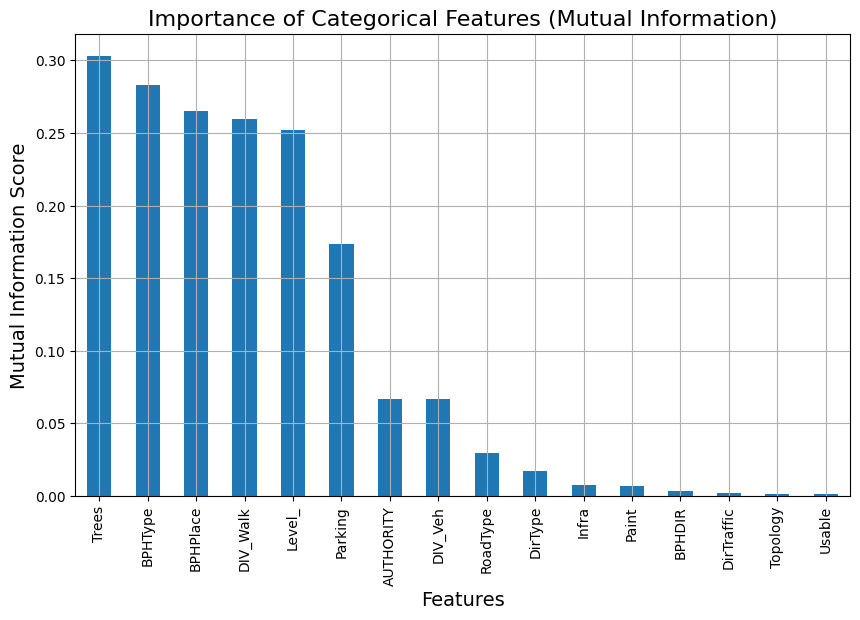

In [3838]:
# Select relevant categorical features
categorical_features = [
    'AUTHORITY', 'BPHDIR', 'BPHType', 'Usable', 'Infra', 'RoadType', 
    'BPHPlace', 'DirType', 'DirTraffic', 'Topology', 'DIV_Veh', 
    'DIV_Walk', 'Parking', 'Level_', 'Paint', 'Trees'
]

# Prepare the data for Mutual Information calculation
X_categorical = data[categorical_features]
y = data['Length_Category'].astype('category').cat.codes  # Encode target variable

# Calculate mutual information
mutual_info = mutual_info_classif(X_categorical, y, discrete_features=True)

# Create a DataFrame to display the results
feature_importance = pd.Series(mutual_info, index=categorical_features).sort_values(ascending=False)

# Print and plot the feature importance
print("Categorical Feature Importance:")
print(feature_importance)

# Visualize the importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Importance of Categorical Features (Mutual Information)', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Mutual Information Score', fontsize=14)
plt.grid(True)
plt.show()


I have decided to focus on features that have an impact of more than 5% on the target variable for now.

In [3839]:
# Select important categorical features based on a threshold
important_features = feature_importance[feature_importance > 0.05].index.tolist()
print("Selected Important Features:")
print(important_features)


Selected Important Features:
['Trees', 'BPHType', 'BPHPlace', 'DIV_Walk', 'Level_', 'Parking', 'AUTHORITY', 'DIV_Veh']


### **4. Model Building and Comparison using Cross-Validation (CV)**

In [3840]:
# Selected Features
categorical_features = ['BPHType', 'Trees', 'Level_', 'Parking', 'AUTHORITY', 'RoadType', 'DIV_Veh', 'DIV_Walk']
numerical_features = ['TWIDTH']


In [3841]:
# Defining a custom category order
length_category_dtype = CategoricalDtype(categories=['Short', 'Medium', 'Long'], ordered=True)

# Converting the Length_Category column to a categorical type with the custom order
data['Length_Category'] = data['Length_Category'].astype(length_category_dtype)


In [3842]:
# Data Splitting: Train-Test split
y = data['Length_Category'].astype('category').cat.codes
X = data[categorical_features + numerical_features]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3843]:
# Cross-Validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [3844]:
# List of models for comparison
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(penalty='l2', C=0.1, max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', random_state=42),
    'Neural Networks': MLPClassifier(max_iter=1000, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [3845]:
# Defining OneHotEncoder and preprocessor
encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', encoder, categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)


In [3846]:
# Storing results
results = []

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    print(f"Evaluating {model_name} with CV...")
    
    # Cross-validation for multiple metrics
    scores = cross_validate(
        pipeline, X_train, y_train, cv=cv, 
        scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
        return_train_score=False
    )
    
    # Append results
    results.append({
        'Model': model_name,
        'Accuracy (CV Mean)': np.mean(scores['test_accuracy']),
        'Precision (CV Mean)': np.mean(scores['test_precision_weighted']),
        'Recall (CV Mean)': np.mean(scores['test_recall_weighted']),
        'F1 Score (CV Mean)': np.mean(scores['test_f1_weighted']),
    })

Evaluating Random Forest with CV...
Evaluating Logistic Regression with CV...
Evaluating SVM with CV...
Evaluating Neural Networks with CV...
Evaluating Gradient Boosting with CV...


In [3847]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort the DataFrame by 'ACCURACY' in descending order
results_df_sorted = results_df.sort_values(by='Accuracy (CV Mean)', ascending=False)

print("\nCross-Validation Results (Sorted by Accuracy):")
results_df_sorted



Cross-Validation Results (Sorted by Accuracy):


,Model,Accuracy (CV Mean),Precision (CV Mean),Recall (CV Mean),F1 Score (CV Mean)
4,Gradient Boosting,0.668484,0.685110,0.668484,0.662341
1,Logistic Regression,0.660914,0.674742,0.660914,0.653748
0,Random Forest,0.655949,0.660183,0.655949,0.656492
2,SVM,0.652554,0.663050,0.652554,0.636896
3,Neural Networks,0.643931,0.645971,0.643931,0.644368


In [3786]:
# Final evaluation on Test set
best_model_name = results_df.sort_values(by='F1 Score (CV Mean)', ascending=False).iloc[0]['Model']
best_model = models[best_model_name]
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])
final_pipeline.fit(X_train, y_train)
y_pred = final_pipeline.predict(X_test)


In [3787]:
print("\nFinal Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")


Final Test Set Evaluation:
Accuracy: 0.6628
Precision: 0.6902
Recall: 0.6628
F1 Score: 0.6545
